In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [230]:
bikes = pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [231]:
#PREPARE DATA

In [232]:
#dropping index and date column as they are irrelevant
#dropping casual and registered as they are correlated to demand, we just need demand
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(columns = ['index', 'date', 'casual', 'registered'], axis = 1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [233]:
#BASIC DATA ANALYSIS

In [234]:
#no missing values
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

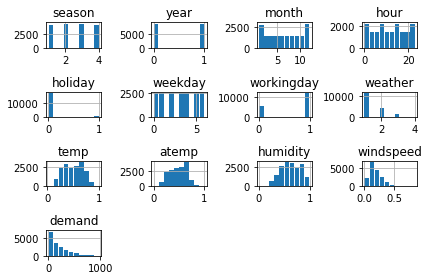

In [235]:
#demand is not normally distributed
#continuous independent variables are almost normally distributed
#we need to do some other analysis for categorical variables
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [236]:
#DATA VISUALISATION OF CONTINUOS VARIABLES

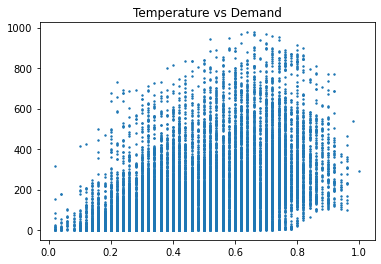

In [237]:
#Demand increases as temperature increase
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2)
plt.show()

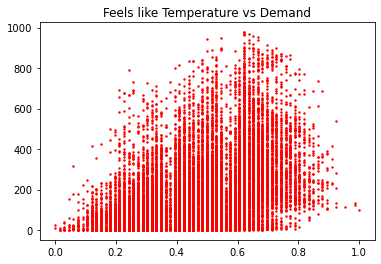

In [238]:
#Demand increases as atemp increase
#temp and atemp seem to be highly correlated.. so we might consider dropping atemp after seeing their correlation
plt.title('Feels like Temperature vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c ='r')
plt.show()

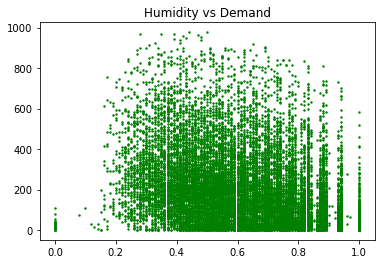

In [239]:
#No relation
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='g')
plt.show()

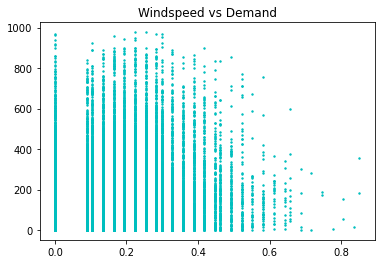

In [240]:
#Demand decreases as windspeed increase
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')
plt.show()

In [241]:
#DATA VISUALISATION OF CATEGORICAL DATA

<BarContainer object of 4 artists>

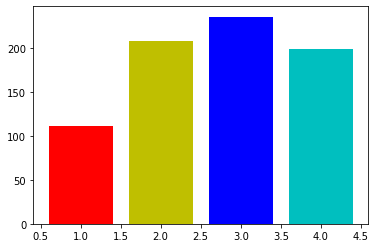

In [242]:
#Average demand per season
#1-spring 2-summer 3-fall 4-winter
#max demand in fall and min in spring
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['season'].unique()
cat_avg = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 2 artists>

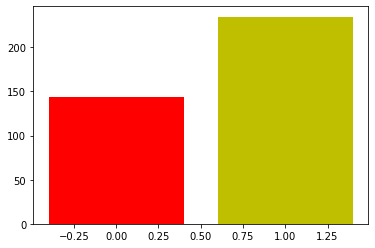

In [243]:
#Average demand per year
#we can see that demand increased with year but we have data of only 2 years which is insufficient to conclude this
#we can drop this feature
cat_list = bikes_prep['year'].unique()
cat_avg = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 12 artists>

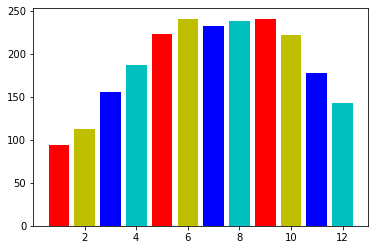

In [244]:
#Average demand per month
#demand is high in summer months and low in winter months
cat_list = bikes_prep['month'].unique()
cat_avg = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 24 artists>

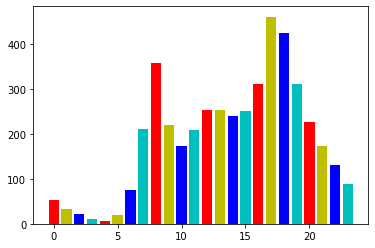

In [245]:
#Average demand per hour
#demand is high at 8am as its office going hr and also at 5pm as its home-returning hr
#we might consider parking alot of bikes near residence in the morning and near office area in the evening
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 2 artists>

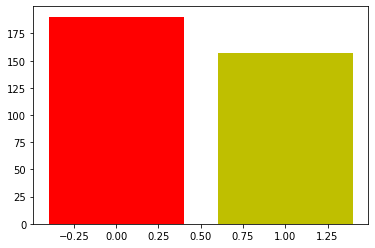

In [246]:
#Average demand per holiday(yes/no)
#demand is hihg on non-holiday days.. so major customer base might be working population
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['holiday'].unique()
cat_avg = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 7 artists>

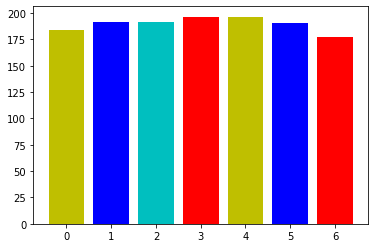

In [247]:
#Average demand per weekday
#no big inference. Can dropthis feature
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['weekday'].unique()
cat_avg = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 2 artists>

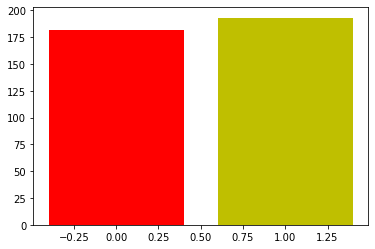

In [248]:
#Average demand per workingday(yes/no)
#Again no such big inference. Can drop this too
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['workingday'].unique()
cat_avg = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

<BarContainer object of 4 artists>

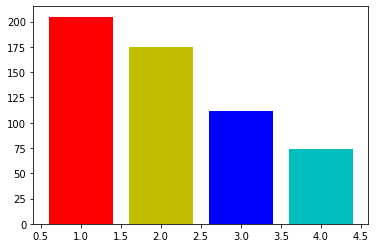

In [249]:
#Average demand per weather
#1-clear 2-foggy 3-light rain 4-heavy rain, thunder storm
#We can clearly see that demand is highest on clear weather days and min when it rains heavily which makes sense logically
#as well. Plots supports our hypothesis
colors = ['r', 'y', 'b', 'c']
cat_list = bikes_prep['weather'].unique()
cat_avg = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_avg, color = colors)

In [250]:
#CHECK FOR OUTLIERS

In [251]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [252]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [253]:
#TESTING MULTICOLINEARITY ASSUMPTION

In [254]:
#temp and atemp are highly correlated. So we will drop atemp
#windspeed has very less correlation with demand.. implies they dont have a linear relation. So we will drop windspeed
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [255]:
bikes_prep = bikes_prep.drop(columns = ['atemp', 'windspeed', 'year', 'workingday', 'weekday'], axis=1)
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [256]:
#TEST AUTOCORRELATION IN DEMAND

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2349cddab20>)

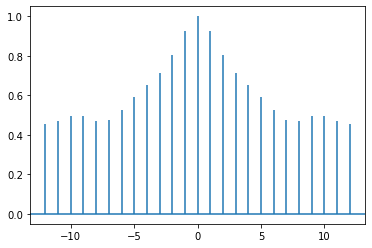

In [257]:
#Since demand seems to be a time-series type of data.. it can have auto-correlation. 
#We can see that there is high auto-correlation upto 5 lags. Lets make shifts but till 3 lags only
temp = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(temp, maxlags=12)

In [258]:
#SOLVING NORMALITY ISSUE

<AxesSubplot:>

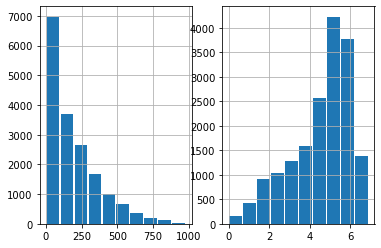

In [259]:
#Before solving auto-correlation issue, first lets tranform Demand to make it normal
#Demand appears to be Log-Normal distribution. Let cj=heck if making log transformation makes it normally distributed
temp = np.log(bikes_prep['demand'])
plt.subplot(1,2,1)
bikes_prep['demand'].hist(rwidth=0.9)
plt.subplot(1,2,2)
temp.hist(rwidth=0.9)
#log tranformaation results in slightly skewed normal distribution

<AxesSubplot:>

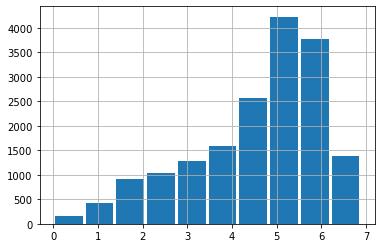

In [260]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])
# bikes_prep.head()
bikes_prep['demand'].hist(rwidth=0.9)

In [261]:
#SOLVING PROBLEM OF AUTOCORRELATION

In [262]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [263]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [264]:
bikes_prep_lag.dtypes
#to use get_dummies function of pandas we first need to convert the datatype to category

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [265]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [266]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)
bikes_prep_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
#TRAIN_TEST SPLIT

In [268]:
X = bikes_prep_lag.drop(['demand'], axis=1)
Y = bikes_prep_lag[['demand']]

In [269]:
#We can't do that random split that we usually perform using traain_test_split func because here we have time-series data or
#time dependent data, ie, demand is auto-correlated. If we randomly take some rows for train, we will damage the auto-
#correlation that we are using in our model. So we will take continuos chunk of rows

train_size = int(0.7*len(X))
X_train = X.values[0:train_size]
X_test = X.values[train_size:len(X)]

Y_train = Y.values[0:train_size]
Y_test = Y.values[train_size:len(Y)]

In [270]:
#CREATE MODEL

In [271]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [272]:
#R-squared values
r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, Y_test)
print(r2_train, r2_test)

0.9195240591465778 0.9287151360253385


In [273]:
#Predicting the y values for X_test
Y_predict = model.predict(X_test)

In [274]:
#Finding Root mean Squared Error of the model
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
rmse

0.38098800498170454